In [1]:
library(ggplot2)

In [1]:
load("modelssaved/cellpose_f20_b150_l500_1e10.RData")

In [2]:
exp_norm = out$exposures/rowSums(out$exposures)
cluster = apply(exp_norm,1,which.max)


In [1]:
# get cells not included
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/cellpose_cell_by_gene_goodgenes_noblanks.csv'
count = read.csv(path1, row.names = 1)


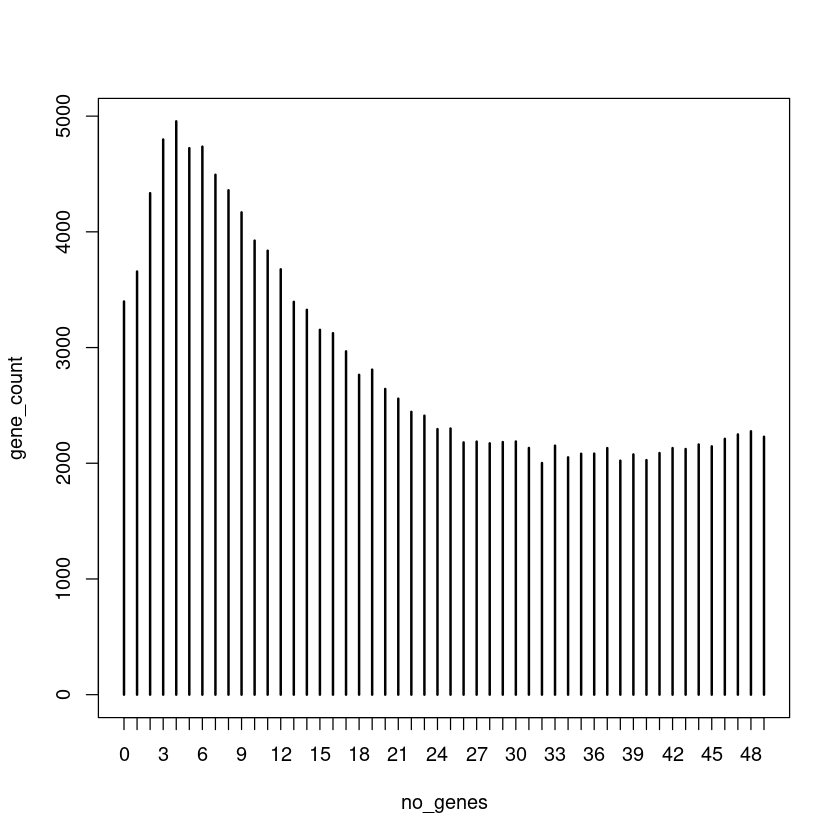

In [21]:
no_genes = rowSums(count > 0)
gene_count = table(no_genes)[1:50]
plot(gene_count)

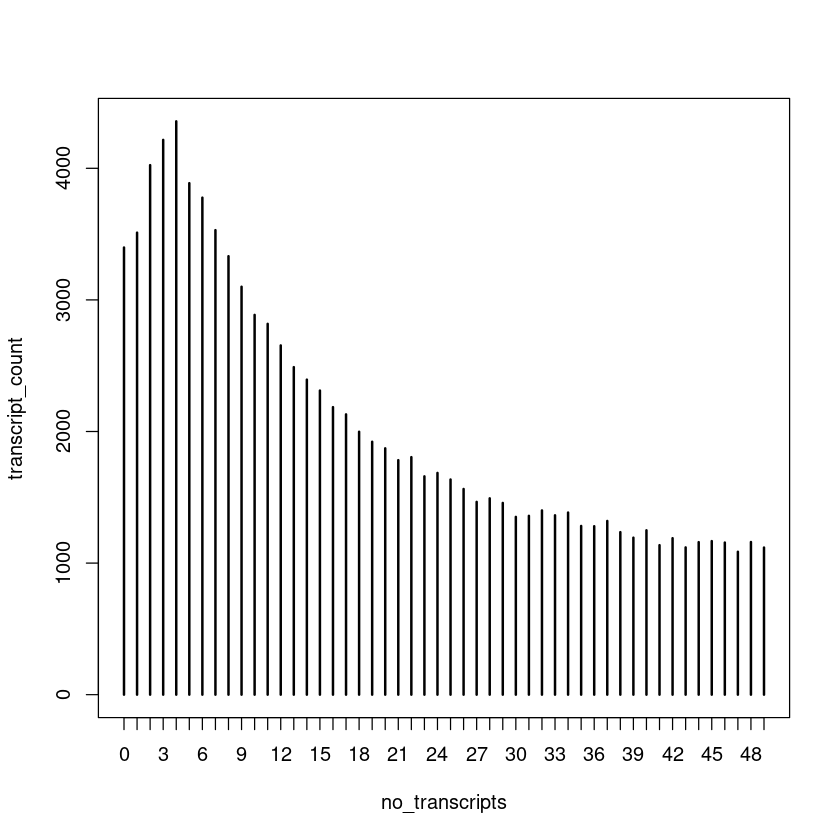

In [23]:
no_transcripts = rowSums(count)
transcript_count = table(no_transcripts)[1:50]
plot(transcript_count)


In [2]:
trans20_idx = which(rowSums(count) < 20)
length(trans20_idx)
dim(count)
count_trans20 = count[-trans20_idx,]
dim(count_trans20)

[1] 60919

[1] 844468    492

[1] 783549    492

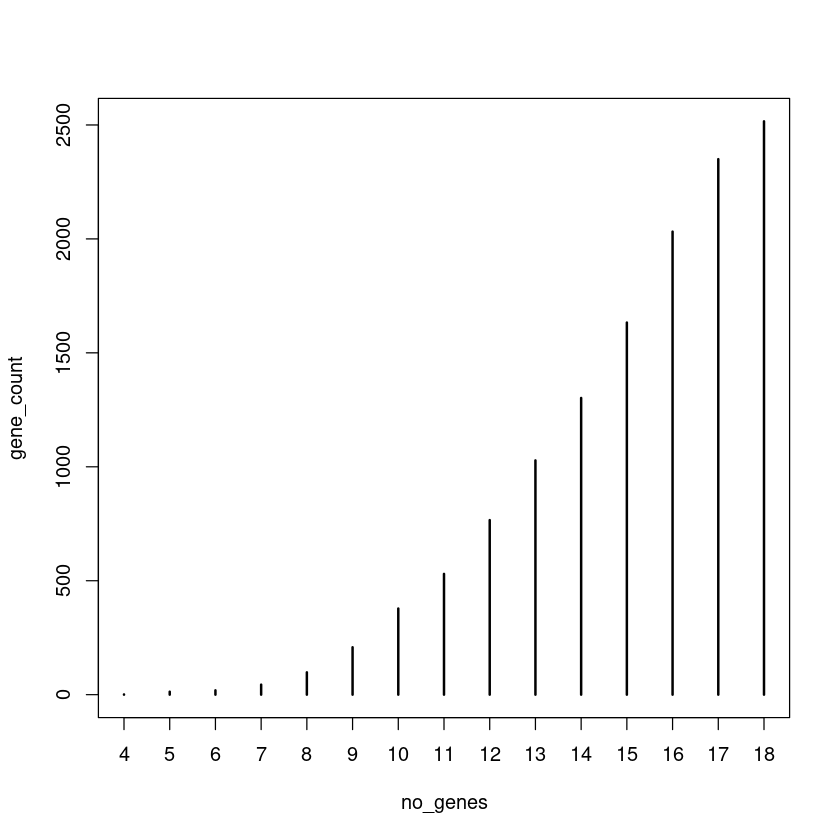

In [5]:
no_genes = rowSums(count_trans20 > 0)
gene_count = table(no_genes)[1:15]
plot(gene_count)

In [8]:
under20genes = which(rowSums(count > 0) < 20)

In [10]:
write.csv(under20genes, "under20genes.csv", row.names = F)

In [11]:
genes = colnames(count)

In [4]:
# no gene count 
no_count = read.csv('data/cell_no_gene_count.csv')[,2]

path2 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/cellpose_cell_metadata.csv'
metadata = read.csv(path2, row.names = 1)

location = metadata[,c('center_x','center_y')]
location = as.matrix(location)
print(nrow(location))
location = location[-no_count,]


[1] 844468


In [14]:
nrow(location)

[1] 767872

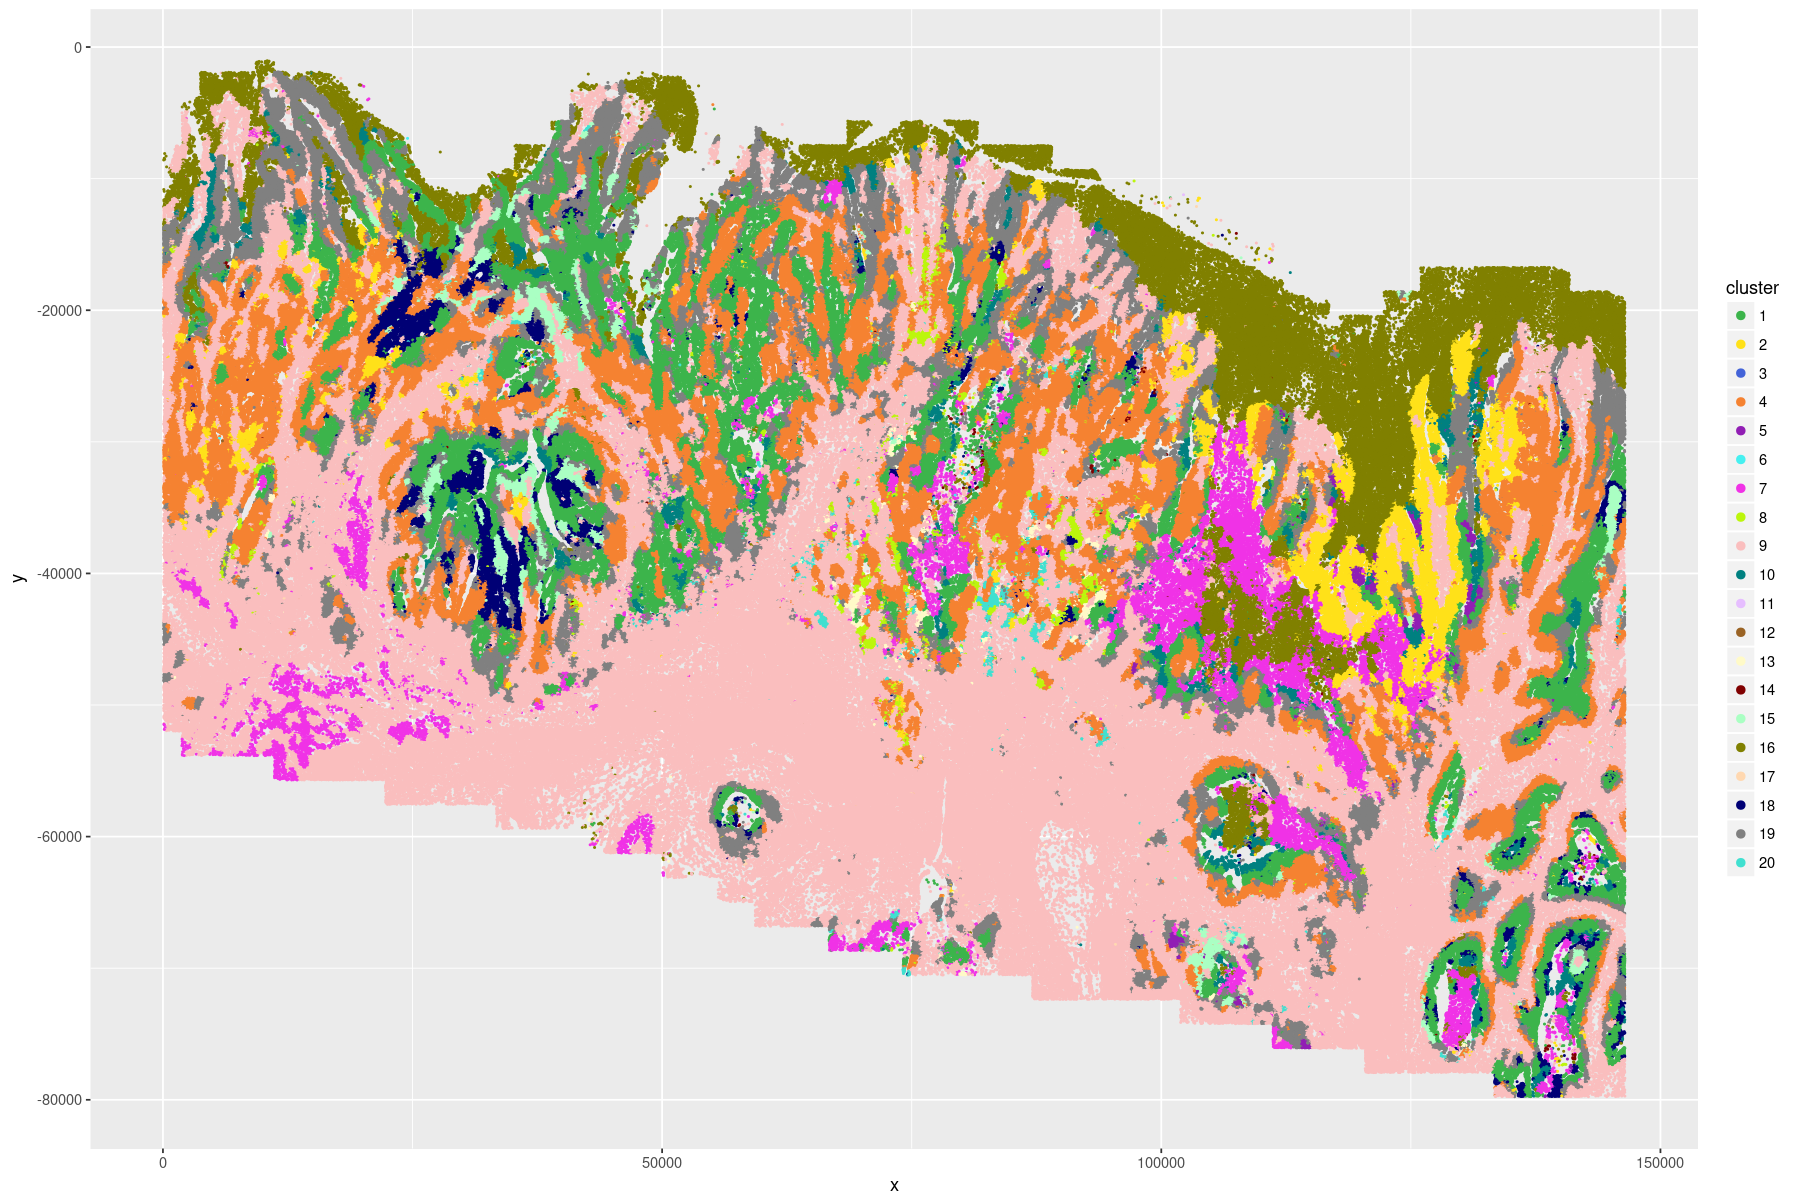

In [7]:
library(ggplot2)
myCol = c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#40e0d0', '#000000', '#2e8b57', '#8b0000', '#808000','#483d8b','#8b008b')

cluster_dat = data.frame(x = location[,1], y = -location[,2], cluster = as.factor(cluster))
options(repr.plot.width=15, repr.plot.height=10)
ggplot(cluster_dat, aes(x = x, y = y, col = cluster))+
geom_point(cex = 0.2)+
scale_color_manual(values=myCol[2:22])+
guides(color = guide_legend(override.aes = list(size = 2)))